In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from gvit.quadtree import QuadTree

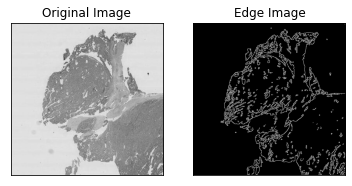

In [8]:
img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/exp/paip.png')
grey_img = img[0:512,0:512, 0]
edges = cv.Canny(grey_img, 100,200)

plt.subplot(121),plt.imshow(grey_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.savefig(fname="paip_canny.jpg")
plt.show()

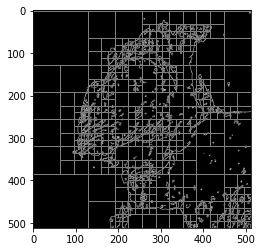

In [9]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')

qdt = QuadTree(domain=edges)
qdt.draw(ax=ax)
plt.savefig(fname="paip_pachify.jpg")
plt.show()

In [10]:
# 8x8 => 868 patches
# 64*64 => 4096 patches  

patch_info = {}
print(qdt.count_patches(patch_info))
print(patch_info)
print(sum(patch_info.values()))


424
{'128*128': 2, '64*64': 17, '16*16': 317, '32*32': 76, '8*8': 12}
424


In [24]:
# save patch sequence
def compress_mix_patches(qdt:QuadTree, img: np.array, to_size:tuple = (8,8,3)):
    h2,w2,c2 = to_size
    seq_patches = qdt.serialize(img=img[0:512,0:512])
    for i in range(len(seq_patches)):
        h1, w1, c1 = seq_patches[i].shape
        assert h1==w1, "Need squared input."
        # print(seq_patches[i].shape, seq_patches[i])
        step =int(h1/to_size[0])
        seq_patches[i] = seq_patches[i][::step,::step]
        assert seq_patches[i].shape == (h2,w2,c2), "Wrong shape {} get, need {}".format(seq_patches[i].shape, (h2,w2,c2))
    return seq_patches

In [26]:
seq_patches = compress_mix_patches(qdt=qdt,img=img,to_size=(8,8,3))
print(len(seq_patches))

424


In [ ]:
#imagenet patchify

import torch
import torchvision
from torchvision import transforms

datapath = './dataset'
def imagenet(datapath=datapath):

    train_transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()  
        ])

    imagenet_data = torchvision.datasets.ImageNet('./dataset', transform= train_transform)
    imagenet_val = torchvision.datasets.ImageNet('./dataset', split="val", transform= train_transform)

    train_loader = torch.utils.data.DataLoader(imagenet_data,
                                            batch_size=4,
                                            shuffle=True,
                                            num_workers=64)
    val_loader = torch.utils.data.DataLoader(imagenet_val,
                                        batch_size=4,
                                        shuffle=True,
                                        num_workers=64)
    train_dataset = iter(train_loader)
    val_dataset = iter(val_loader)
    return train_dataset, val_loader

train_ds,val_ds = imagenet()
print("train samples:{}, val_samples:{}".format(len(train_ds),len(val_ds)))